# Geospatial Data Analysis I 

## Monte Carlo Methods - Solution

In this exercise we want to quantify the uncertainty in the analytical calculation of biological degradation of o-xylene in a contaminated aquifer. The analytical model is given in eq. 6 in Würth et al. (2021): 

<a href="https://www.codecogs.com/eqnedit.php?latex=\lambda&space;=&space;\frac{\Delta&space;\delta&space;^{13}C&space;\cdot&space;k_{f}&space;\cdot&space;i}{\epsilon&space;\cdot&space;s&space;\cdot&space;n_{e}}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\lambda&space;=&space;\frac{\Delta&space;\delta&space;^{13}C&space;\cdot&space;k_{f}&space;\cdot&space;i}{\epsilon&space;\cdot&space;s&space;\cdot&space;n_{e}}" title="\lambda = \frac{\Delta \delta ^{13}C \cdot k_{f} \cdot i}{\epsilon \cdot s \cdot n_{e}}" /></a>

with 

<a href="https://www.codecogs.com/eqnedit.php?latex=k_{f}&space;=&space;\frac{s&space;\cdot&space;n_{e}}{t&space;\cdot&space;i}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?k_{f}&space;=&space;\frac{s&space;\cdot&space;n_{e}}{t&space;\cdot&space;i}" title="k_{f} = \frac{s \cdot n_{e}}{t \cdot i}" /></a>

- First, generate random values for the uncertain input parameters for the equation above. You can find the required information in Table 1 and 3 in the paper (literature folder on ILIAS). Take the values for the well pair G10m - G30u. *N* stands for Normal, *U* for Uniform, and *W* for Weibull distribution. As a Weibull distribution is not easily available in Python, use *U* (0.0013, 0.0016) for the hydraulic gradient. Also note, that some distributions are truncated (see exercise inferential statistics). 

- Then, calculate the hydraulic conductivity and biological degradation rate based on the generated in input values, and visualise the resulting distributions. 


0.00019254041392926442 0.21948569134162527


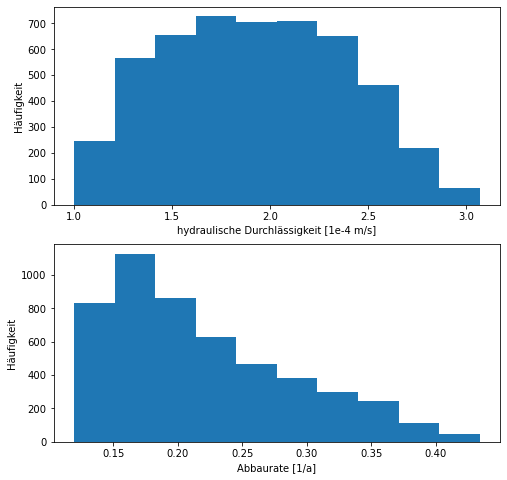

In [ ]:
# Monte-Carlo Simulation for quantifiying degradation of o-xylene

# importing the required Python packages
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import seaborn as sns

# setting the number of MC simulations / iterations 
n = 5000 # number of MC simulations 

# generating random values for the input parameters
# in accordance to the probabality density functions given in the paper

# isotope shift delta 13C [o/oo], truncated to (3.8, 4.8)
a, b = (3.8 - 4.3) / 0.7, (4.8 - 4.3) / 0.7
deltaC = truncnorm.rvs(a, b, 4.3, 0.7, size=n)

# isotope enrichment factor epsilon [-]
epsilon = np.random.uniform(-3.2, -1.1, n)

# distance [m]
s = np.random.uniform(415, 423, n)

# effective porosity [-], trunctaed to (0.12, 0.30)
a, b = (0.12 - 0.21) / 0.09, (0.3 - 0.21) / 0.09
neff = truncnorm.rvs(a, b, 0.21, 0.09, size=n)

# time, truncated to (3e8, 3.3e8)
a, b = (3e8 - 3.15e8) / 1.6e6, (3.3e8 - 3.15e8) / 1.6e6
t = truncnorm.rvs(a, b, 3.15e8, 1.6e6, size=n)

# hydraulic gradient [-]
grad = np.random.uniform(1.3e-3, 1.6e-3, n)

# analytical modelling 
kf = (s*neff)/(t*grad)
lambda_rate = -(deltaC*kf*grad)/(epsilon*s*neff)

lambda_rate = lambda_rate*3600*24*365  # to get values as [1/a]

# printing mean values for hydraulic conductivity and degradation rate
print(kf.mean(), lambda_rate.mean())

# visualising the generated output values for hydraulic conductivity and degradation rate
# in two seperate histogram plots 

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(2,1,1)
kf_neu = kf*10000
plt.hist(kf_neu)
plt.ylabel("Häufigkeit")
plt.xlabel("hydraulische Durchlässigkeit [1e-4 m/s]")

ax1 = fig.add_subplot(2,1,2)
plt.hist(lambda_rate)
plt.ylabel("Häufigkeit")
plt.xlabel("Abbaurate [1/a]")

plt.show()



- Compare your results with the ones in figure 3 in the paper. Are they consistent?

## END

### References: 

Würth et al. (2021): Quantifying biodegradation rate constants of o-xylene by combining compound-specific isotope analysis and groundwater dating. Journal of Contaminant Hydrology, 238, 103757